In [130]:
# Importing Python libraries

import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tabulate import tabulate
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [131]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

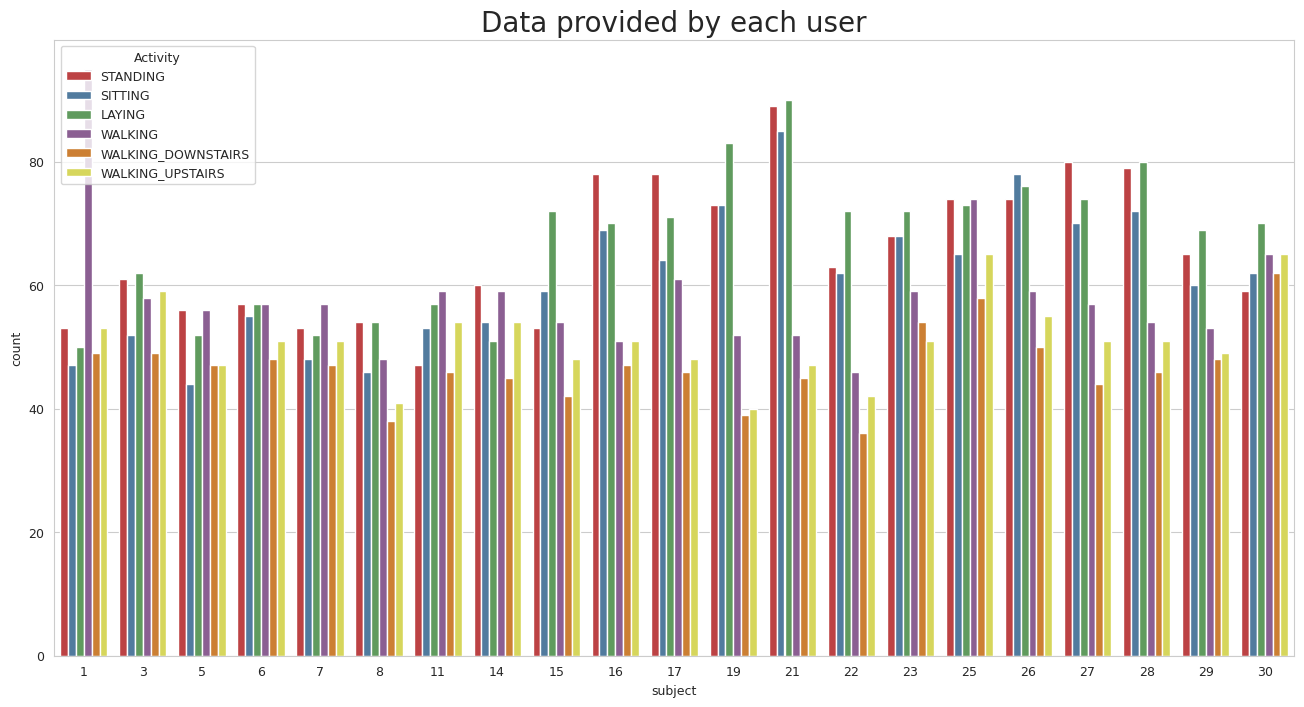

In [132]:
# Visualizing The Dataset:

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

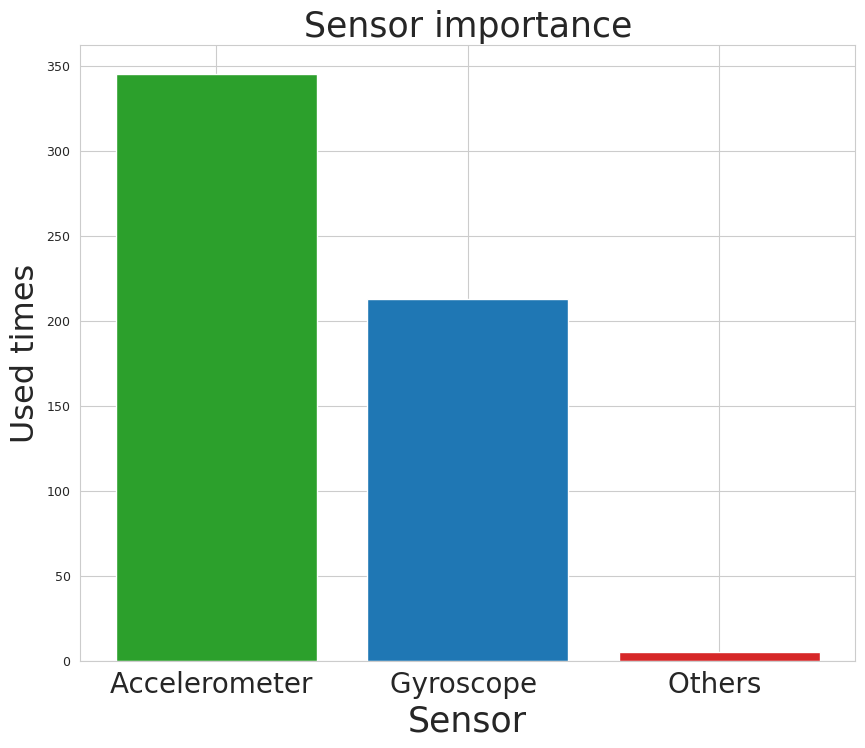

In [133]:
# Visualizing Sensor Importance:

sensor_counts = {'Accelerometer': 0, 'Gyroscope': 0, 'Others': 0}
for col in train.columns:
    if 'Acc' in col:
        sensor_counts['Accelerometer'] += 1
    elif 'Gyro' in col:
        sensor_counts['Gyroscope'] += 1
    else:
        sensor_counts['Others'] += 1

plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope ','Others '], height = [sensor_counts['Accelerometer'], sensor_counts['Gyroscope'], sensor_counts['Others']], color=['tab:green', 'tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Sensor", size=25)
plt.ylabel("Used times", size=23)
plt.xticks(fontsize=20)
plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

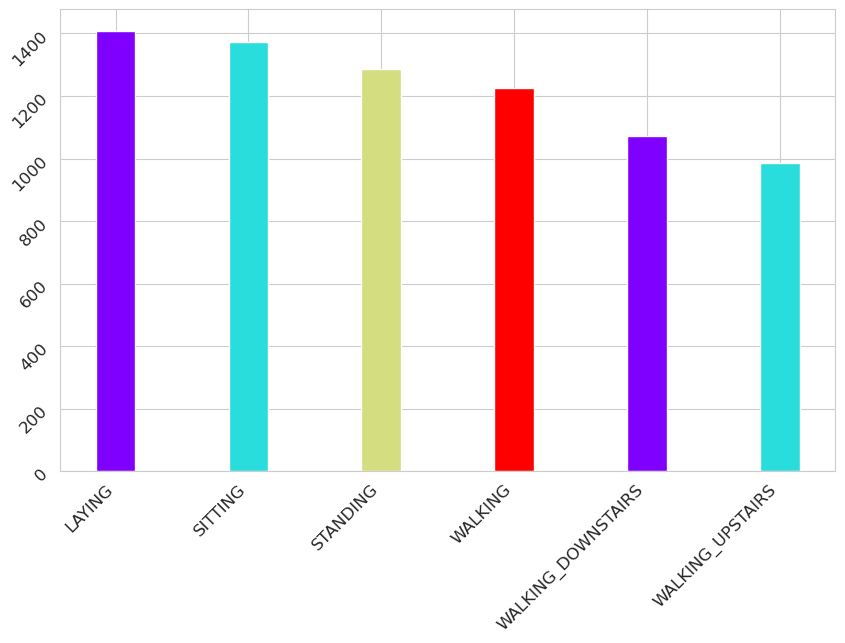

In [134]:
# Bar plot showing count of each activity in the dataset

activity = train["Activity"]
count_of_each_activity = np.array(activity.value_counts())
activities = sorted(activity.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,6))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12,ha='right')
plt.yticks(rotation=45,fontsize=12)

([<matplotlib.patches.Wedge at 0x1eea35c7700>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

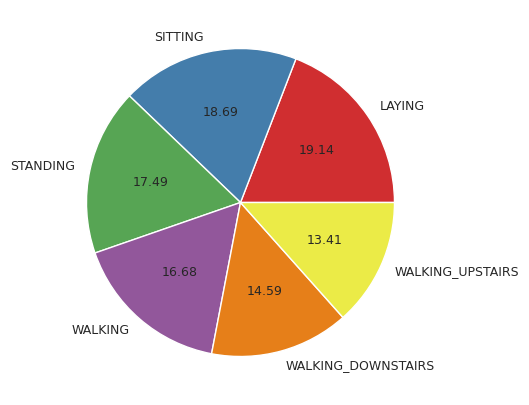

In [135]:
# Pie chart showing count of each activity in the dataset

mlt.rcParams['font.size'] = 9.0
plt.figure(figsize=(10,5))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

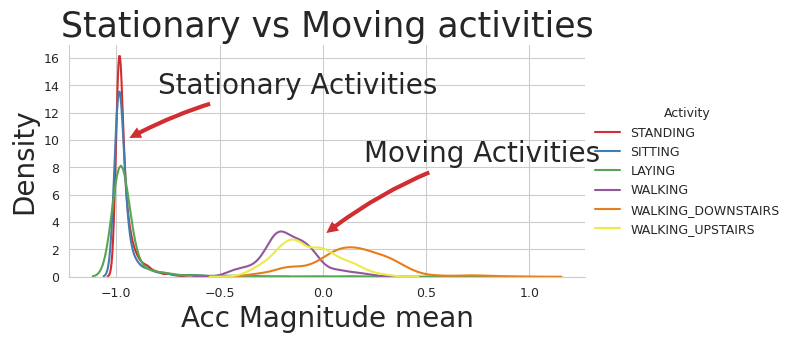

In [136]:
# The plot is divided into two parts, one for stationary activities and the other for moving activities

sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', aspect=2)
facetgrid.map(sns.kdeplot,'tBodyAccMag-mean()')\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

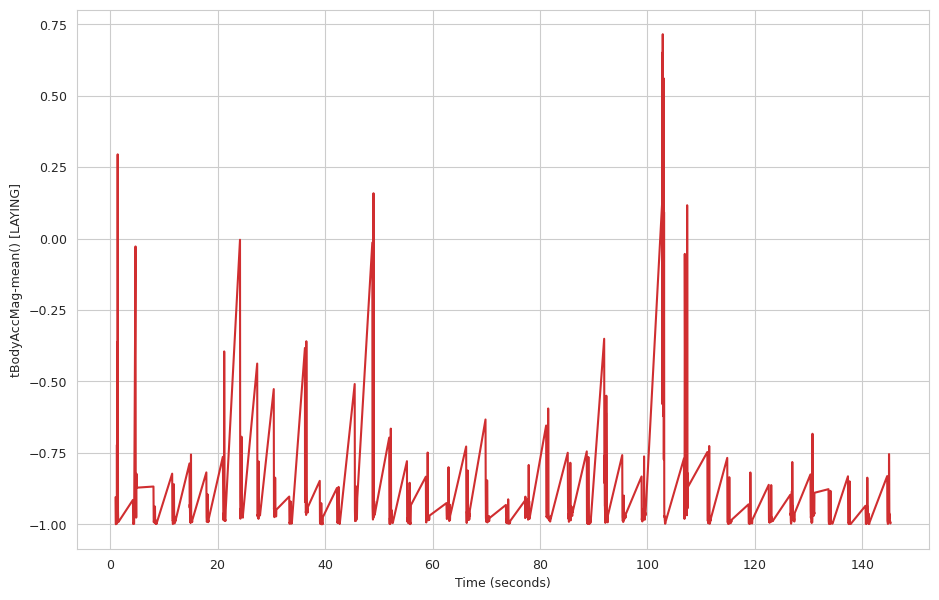

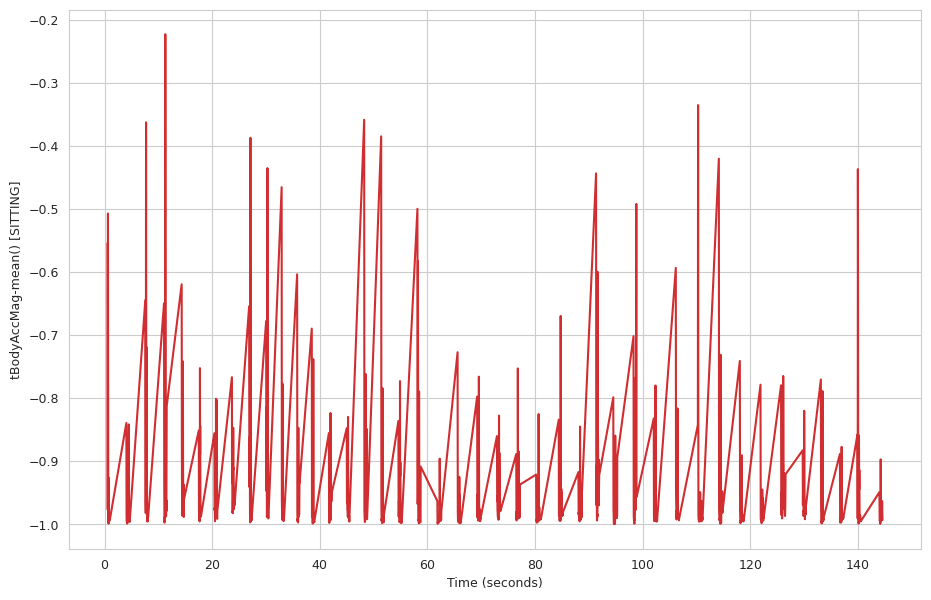

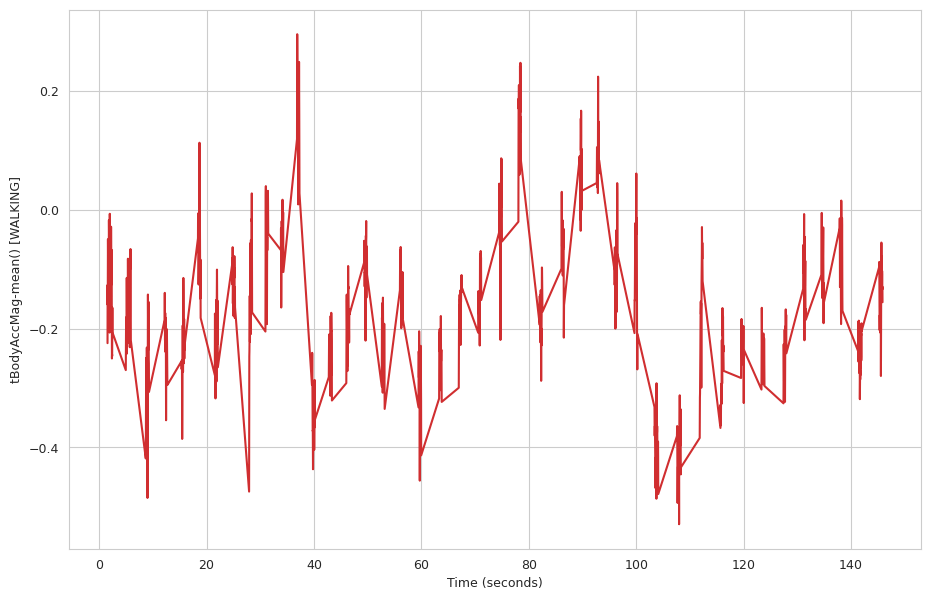

In [137]:
# Set the sampling rate of the accelerometer data
sampling_rate = 50  # Hz

# Create a time column based on the index and sampling rate
train['time'] = train.index / sampling_rate


# Filter the rows where Activity is 'LAYING'
standing_data = train[train['Activity'] == 'LAYING']

# Plot tBodyAccMag-mean() vs time for the filtered data
fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(standing_data['time'], standing_data['tBodyAccMag-mean()'])
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('tBodyAccMag-mean() [LAYING]')

# Filter the rows where Activity is 'SITTING'
standing_data = train[train['Activity'] == 'SITTING']

# Plot tBodyAccMag-mean() vs time for the filtered data
fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(standing_data['time'], standing_data['tBodyAccMag-mean()'])
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('tBodyAccMag-mean() [SITTING]')


# Filter the rows where Activity is 'WALKING'
standing_data = train[train['Activity'] == 'WALKING']

# Plot tBodyAccMag-mean() vs time for the filtered data
fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(standing_data['time'], standing_data['tBodyAccMag-mean()'])
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('tBodyAccMag-mean() [WALKING]')

plt.show()

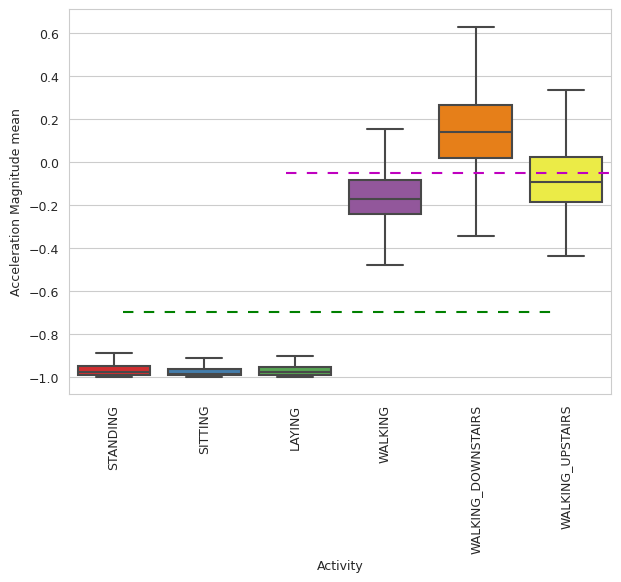

In [138]:
# Visualization of the mean acceleration magnitude for different activities in a dataset
# boxplot or box-and-whisker plot

plt.figure(figsize=(7,5))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [139]:
# Analysing the data

print("--------- Training Data ---------")
print(train.head())
print("--------- Test Data ---------")
print(test.head())

--------- Training Data ---------
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  t

In [140]:
# Checking for null values inside the data

# NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
# NAs[NAs.sum(axis=1) > 0]
print("Training Data:",train.isnull().values.any())

Training Data: False


In [141]:
# NAs2 = pd.concat([test.isnull().sum()], axis=1, keys=["Test"])
# NAs2[NAs2.sum(axis=1) > 0]
print("Testing Data:",test.isnull().values.any())

Testing Data: False


In [142]:
# In this case we don't need the 'subject' column

train.drop('subject', axis =1, inplace=True)
test.drop('subject', axis =1, inplace=True)

In [143]:
print("************TRAIN*************")
print(train.head())
print("*************Test*************")
print(test.head())

************TRAIN*************
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBod

In [144]:
# Showing all the columns

colm = [i for i in test]
colm

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [145]:
# It is also important to check the various data types present in our data.
# In this particular case, we can observe that we have 561 dimensions of float type data and 1 dimension of object type data.

print("*************Train*************")
print(train.dtypes.value_counts())
print("*************Test*************")
print(test.dtypes.value_counts())

*************Train*************
float64    562
object       1
dtype: int64
*************Test*************
float64    561
object       1
dtype: int64


In [146]:
# The object type data

obj_feature = (train.dtypes == object)
obj_col = train.columns[obj_feature]
obj_col

Index(['Activity'], dtype='object')

In [147]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [148]:
for x in [train, test]:
    print(x['Activity'])

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object
0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object


In [149]:
# Applying LabelEncoder function

labEncoder = LabelEncoder()
for x in [train, test]:
    x['Activity'] = labEncoder.fit_transform(x.Activity)
    
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

In [150]:
train.Activity.sample(10)

2771    0
152     5
4737    1
7094    3
5521    1
7269    3
6600    4
1708    3
7332    5
769     3
Name: Activity, dtype: int32

In [151]:
test.Activity.sample(10)

2470    0
1611    3
2899    4
699     3
1880    2
1722    2
1381    2
2278    1
1211    2
1652    4
Name: Activity, dtype: int32

In [152]:
test.Activity

0       2
1       2
2       2
3       2
4       2
       ..
2942    5
2943    5
2944    5
2945    5
2946    5
Name: Activity, Length: 2947, dtype: int32

In [153]:
# Finding the Correlation/ Relationships between the features
# This dataframe can be used to analyze the relationships between different features and 
# identify any highly correlated features that may need to be removed or 
# combined in order to avoid multicollinearity in a machine learning model.

feature_columns = train.columns[: -1] 
correlated_values = train[feature_columns].corr()
correlated_values = (correlated_values.stack().to_frame().reset_index().rename(columns={'level_0': 'Features-1', 'level_1': 'Features-2', 0:'Correlation'}))
correlated_values

,Features-1,Features-2,Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903
...,...,...,...
315839,Activity,"angle(tBodyGyroJerkMean,gravityMean)",0.001242
315840,Activity,"angle(X,gravityMean)",-0.618504
315841,Activity,"angle(Y,gravityMean)",0.725408
315842,Activity,"angle(Z,gravityMean)",0.611528


In [154]:
correlated_values['Absolute_Correlation'] = correlated_values.Correlation.abs()
correlated_values

,Features-1,Features-2,Correlation,Absolute_Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952,0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903,0.021903
...,...,...,...,...
315839,Activity,"angle(tBodyGyroJerkMean,gravityMean)",0.001242,0.001242
315840,Activity,"angle(X,gravityMean)",-0.618504,0.618504
315841,Activity,"angle(Y,gravityMean)",0.725408,0.725408
315842,Activity,"angle(Z,gravityMean)",0.611528,0.611528


In [155]:
# Picking most correlated features
train_field = correlated_values.sort_values('Correlation', ascending = False).query('Absolute_Correlation>0.85')
train_field

,Features-1,Features-2,Correlation,Absolute_Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
112613,tBodyAccMag-mean(),tGravityAccMag-mean(),1.000000,1.000000
114302,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
114289,tBodyAccMag-max(),tBodyAccMag-max(),1.000000,1.000000
113739,tBodyAccMag-mad(),tGravityAccMag-mad(),1.000000,1.000000
...,...,...,...,...
42224,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,2",-0.994684,0.994684
314762,"angle(Z,gravityMean)",tGravityAcc-mean()-Z,-0.995070,0.995070
24164,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.995070,0.995070
41100,"tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2",-0.995297,0.995297


In [156]:
# Use StratifiedShuffleSplit to split the data into train and validation sets
split_data = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Get the indices for train and validation sets
train_idx, val_idx = next(split_data.split(train[feature_columns], train.Activity))

# Split the train data into feature columns and target column
x_train = train.loc[train_idx, feature_columns]
y_train = train.loc[train_idx, 'Activity']

# Split the validation data into feature columns and target column
x_val = train.loc[val_idx, feature_columns]
y_val = train.loc[val_idx, 'Activity']

In [157]:
y_train.value_counts(normalize = True)

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64

In [158]:
y_val.value_counts(normalize = True)

0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64

In [159]:
# Initialize a Random Forest classifier with 100 trees and set the random state to ensure reproducibility
ran_for = RandomForestClassifier(n_estimators = 100, random_state=42)
ran_for = ran_for.fit(x_train, y_train)

# Initialize a K-Nearest Neighbors classifier with k=15 and the 'distance' weighting scheme using the Manhattan distance metric
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', metric='manhattan')
knn = knn.fit(x_train, y_train)

# Initialize a Logistic Regression classifier with default settings and set the random state to ensure reproducibility
logi_reg = LogisticRegression(random_state=42, solver='liblinear')
logi_reg = logi_reg.fit(x_train, y_train)

# Initialize a Multi-Class Support Vector Machine classifier using the One-vs-Rest strategy and the RBF kernel with default settings
svm_mc = OneVsRestClassifier(SVC(kernel='rbf', random_state=42, gamma='scale', probability=True))
svm_mc = svm_mc.fit(x_train, y_train)

# Initialize a Support Vector Machine classifier with the linear kernel and default settings, and set the random state to ensure reproducibility
linear_svm = SVC(kernel='linear', random_state=42, probability=True)
linear_svm = linear_svm.fit(x_train, y_train)

In [160]:
# With regularization

# Create a random forest classifier with regularization
rf_clf_r = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42, min_samples_leaf=5)
rf_clf_r = rf_clf_r.fit(x_train, y_train)


# Apply L2 regularization to logistic regression
log_reg_r = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear', random_state=42)
log_reg_r = log_reg_r.fit(x_train, y_train)

In [161]:
# Create empty lists to store the predicted labels and predicted probabilities for each model
y_predict = list()
y_proba = list()

# Define a list of model labels and a list of model instances for the models we want to evaluate
labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']
models = [ran_for, logi_reg, knn, svm_mc, linear_svm]

# Iterate through the list of model labels and instances, making predictions and storing them in the appropriate list
for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))

# Concatenate the predicted labels and probabilities for each model into separate dataframes
y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

# Display the first few rows of the predicted labels dataframe
y_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0,0,0,0,0
1,5,5,5,5,5
2,1,1,1,1,1
3,0,0,0,0,0
4,3,3,3,3,3


In [162]:
y_proba.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0.96,0.985106,1.000000,0.997895,0.995264
1,0.89,0.980274,1.000000,0.998774,0.992527
2,0.95,0.998276,1.000000,0.998671,0.998367
3,0.94,0.999994,1.000000,0.999996,0.999011
4,0.97,0.997874,0.943166,0.999463,0.997944


In [163]:
# Create an empty list to store the error metrics for each model
err_metrics = list()

# Iterate through the list of model labels, computing the precision, recall, F-score, and accuracy for each model and storing the results in the appropriate list
for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_val, y_predict[lab])
    err_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
# Concatenate the error metrics for each model into a single dataframe
err_metrics= pd.concat(err_metrics, axis =1) 

# Display the error metrics dataframe
err_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.993700,0.999548,0.985733,0.999098,1.0
Recall,0.993654,0.999547,0.985041,0.999093,1.0
F_score,0.993657,0.999547,0.985010,0.999093,1.0
Accuracy,0.993654,0.999547,0.985041,0.999093,1.0


In [164]:
# Apply cross-validation
scores = cross_val_score(ran_for, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (RF):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (RF): [0.99514563 0.99222546 0.99028183 0.99902818 0.99611273]
Mean score: 0.9945587666411919


In [165]:
# Apply cross-validation
scores = cross_val_score(logi_reg, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (LR):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (LR): [0.99805825 1.         0.99805637 1.         1.        ]
Mean score: 0.9992229235660977


In [166]:
# Apply cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (KNN):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (KNN): [0.98543689 0.97862002 0.97667638 0.98639456 0.98347911]
Mean score: 0.9821213922462189


In [167]:
# Apply cross-validation
scores = cross_val_score(svm_mc, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (MC SVM):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (MC SVM): [0.99708738 0.99708455 0.99708455 0.99902818 0.99805637]
Mean score: 0.9976682045911291


In [168]:
# Apply cross-validation
scores = cross_val_score(linear_svm, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (Linear SVM):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (Linear SVM): [1.         1.         0.99902818 1.         1.        ]
Mean score: 0.9998056365403304


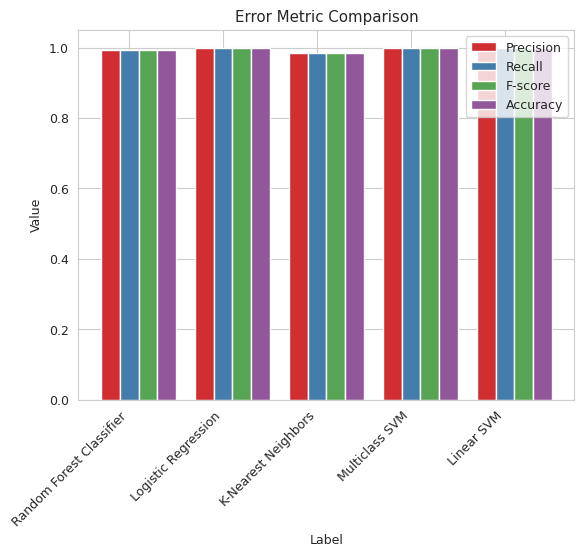

In [169]:
precision_values = err_metrics.loc['Precision', :]
recall_values = err_metrics.loc['Recall', :]
fscore_values = err_metrics.loc['F_score', :]
accuracy_values = err_metrics.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

In [170]:
# Print out the accuracy for each activity label
models_comp = {'Random Forest': ran_for, 'Logistic Regression': logi_reg, 'KNN': knn, 'Multiclass SVM': svm_mc, 'Linear SVM': linear_svm}
accuracies = {label: {name: [] for name in models} for label in range(6)}
results = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_comp.items():
        y_pred = model.predict(x_val[y_val == label])
        acc = accuracy_score(y_val[y_val == label], y_pred)
        print(f'{name} accuracy for {label_name}: {acc:.4f}')
        accuracies[label][name] = acc
        row.append(acc)
    results.append(row)

Random Forest accuracy for LAYING: 1.0000
Logistic Regression accuracy for LAYING: 1.0000
KNN accuracy for LAYING: 0.9929
Multiclass SVM accuracy for LAYING: 1.0000
Linear SVM accuracy for LAYING: 1.0000
Random Forest accuracy for SITTING: 0.9845
Logistic Regression accuracy for SITTING: 1.0000
KNN accuracy for SITTING: 0.9275
Multiclass SVM accuracy for SITTING: 0.9948
Linear SVM accuracy for SITTING: 1.0000
Random Forest accuracy for STANDING: 0.9927
Logistic Regression accuracy for STANDING: 0.9976
KNN accuracy for STANDING: 0.9951
Multiclass SVM accuracy for STANDING: 1.0000
Linear SVM accuracy for STANDING: 1.0000
Random Forest accuracy for WALKING: 0.9891
Logistic Regression accuracy for WALKING: 1.0000
KNN accuracy for WALKING: 1.0000
Multiclass SVM accuracy for WALKING: 1.0000
Linear SVM accuracy for WALKING: 1.0000
Random Forest accuracy for WALKING_DOWNSTAIRS: 1.0000
Logistic Regression accuracy for WALKING_DOWNSTAIRS: 1.0000
KNN accuracy for WALKING_DOWNSTAIRS: 1.0000
Multic

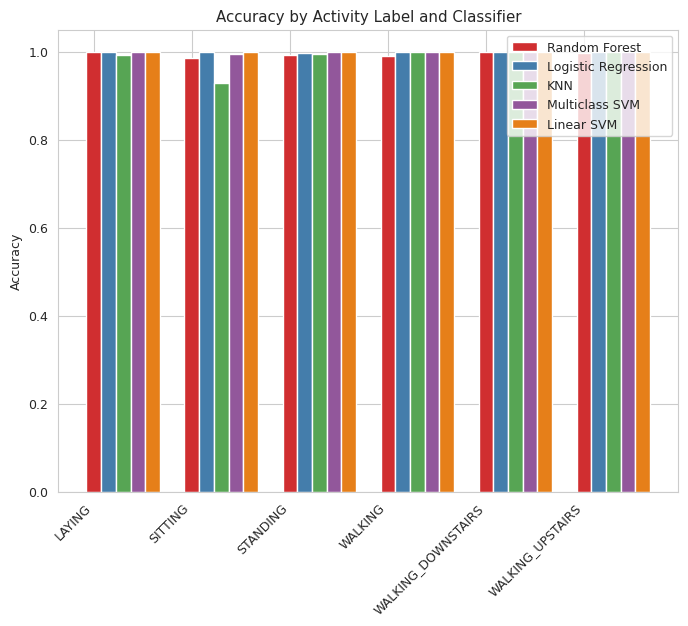

In [171]:
# Plot the bar chart
labels_a = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_a))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_comp):
    accuracies_list = [accuracies[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels_a, rotation=45, ha='right')
ax.legend()

plt.show()

In [172]:
headers = ["Activity Label"] + list(models_comp.keys())
print(tabulate(results, headers=headers, tablefmt="grid"))

+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| Activity Label     |   Random Forest |   Logistic Regression |      KNN |   Multiclass SVM |   Linear SVM |
+====================+=================+=======================+==========+==================+==============+
| LAYING             |        1        |              1        | 0.992891 |         1        |            1 |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| SITTING            |        0.984456 |              1        | 0.927461 |         0.994819 |            1 |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| STANDING           |        0.992718 |              0.997573 | 0.995146 |         1        |            1 |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| WALKING 

In [173]:
yr_predict = list()
yr_proba = list()

labels_r = ['Random Forest Classifier(Regularization)', 'Logistic Regression(Regularization)']
models_r = [rf_clf_r, log_reg_r]

for lab, mod in zip(labels_r, models_r):
    yr_predict.append(pd.Series(mod.predict(x_val), name = lab))
    yr_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))

yr_predict = pd.concat(yr_predict, axis = 1)
yr_proba = pd.concat(yr_proba, axis = 1)
yr_predict.head()

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
0,0,0
1,5,5
2,1,1
3,0,0
4,3,3


In [174]:
yr_proba.head()

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
0,0.975754,0.999405
1,0.919120,0.999228
2,0.962511,0.999429
3,0.980000,0.999601
4,0.949746,0.977693


In [175]:
err_metrics_r = list()

for lab in labels_r:
    precision, recall, f_score, _ = error_metric(y_val, yr_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_val, yr_predict[lab])
    err_metrics_r.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
err_metrics_r= pd.concat(err_metrics_r, axis =1) 
err_metrics_r

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
Precision,0.991518,0.999093
Recall,0.991387,0.999093
F_score,0.991383,0.999093
Accuracy,0.991387,0.999093


In [176]:
# Apply cross-validation
scores = cross_val_score(rf_clf_r, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (RF_r):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (RF_r): [0.98737864 0.98445092 0.98153547 0.99708455 0.9941691 ]
Mean score: 0.9889237359298783


In [177]:
# # Apply cross-validation
# scores = cross_val_score(log_reg_r, x_train, y_train, cv=5)

# # Print the scores
# print("Cross-validation scores (LR_r):", scores)
# print("Mean score:", scores.mean())

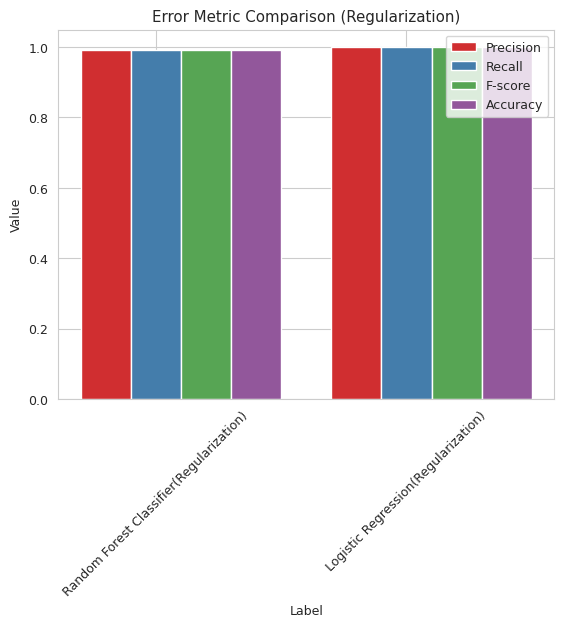

In [178]:
precision_values = err_metrics_r.loc['Precision', :]
recall_values = err_metrics_r.loc['Recall', :]
fscore_values = err_metrics_r.loc['F_score', :]
accuracy_values = err_metrics_r.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison (Regularization)')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45)
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

In [179]:
# Print out the accuracy for each activity label
models_compr = {'Random Forest (R)': rf_clf_r, 'Logistic Regression (R)': log_reg_r}
accuracies_r = {label: {name: [] for name in models} for label in range(6)}
results_r = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compr.items():
        y_pred = model.predict(x_val[y_val == label])
        acc_r = accuracy_score(y_val[y_val == label], y_pred)
        print(f'{name} accuracy for {label_name}: {acc_r:.4f}')
        accuracies_r[label][name] = acc_r
        row.append(acc_r)
    results_r.append(row)

Random Forest (R) accuracy for LAYING: 1.0000
Logistic Regression (R) accuracy for LAYING: 1.0000
Random Forest (R) accuracy for SITTING: 0.9637
Logistic Regression (R) accuracy for SITTING: 1.0000
Random Forest (R) accuracy for STANDING: 0.9927
Logistic Regression (R) accuracy for STANDING: 0.9976
Random Forest (R) accuracy for WALKING: 0.9973
Logistic Regression (R) accuracy for WALKING: 1.0000
Random Forest (R) accuracy for WALKING_DOWNSTAIRS: 1.0000
Logistic Regression (R) accuracy for WALKING_DOWNSTAIRS: 1.0000
Random Forest (R) accuracy for WALKING_UPSTAIRS: 0.9969
Logistic Regression (R) accuracy for WALKING_UPSTAIRS: 0.9969


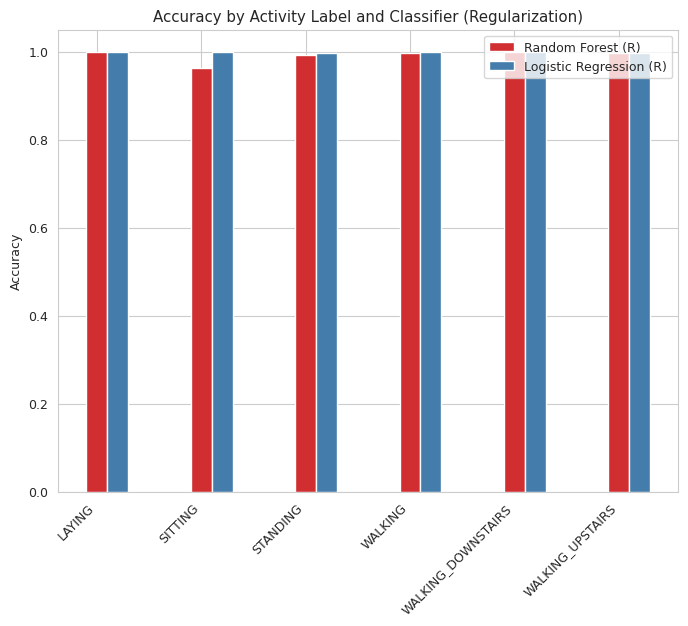

In [180]:
# Plot the bar chart
labels_ar = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_a))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_compr):
    accuracies_list_r = [accuracies_r[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list_r, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier (Regularization)')
ax.set_xticks(x)
ax.set_xticklabels(labels_ar, rotation=45, ha='right')
ax.legend()

plt.show()

In [181]:
headers = ["Activity Label"] + list(models_compr.keys())
print(tabulate(results_r, headers=headers, tablefmt="grid"))

+--------------------+---------------------+---------------------------+
| Activity Label     |   Random Forest (R) |   Logistic Regression (R) |
+====================+=====================+===========================+
| LAYING             |            1        |                  1        |
+--------------------+---------------------+---------------------------+
| SITTING            |            0.963731 |                  1        |
+--------------------+---------------------+---------------------------+
| STANDING           |            0.992718 |                  0.997573 |
+--------------------+---------------------+---------------------------+
| WALKING            |            0.997283 |                  1        |
+--------------------+---------------------+---------------------------+
| WALKING_DOWNSTAIRS |            1        |                  1        |
+--------------------+---------------------+---------------------------+
| WALKING_UPSTAIRS   |            0.996894 |       

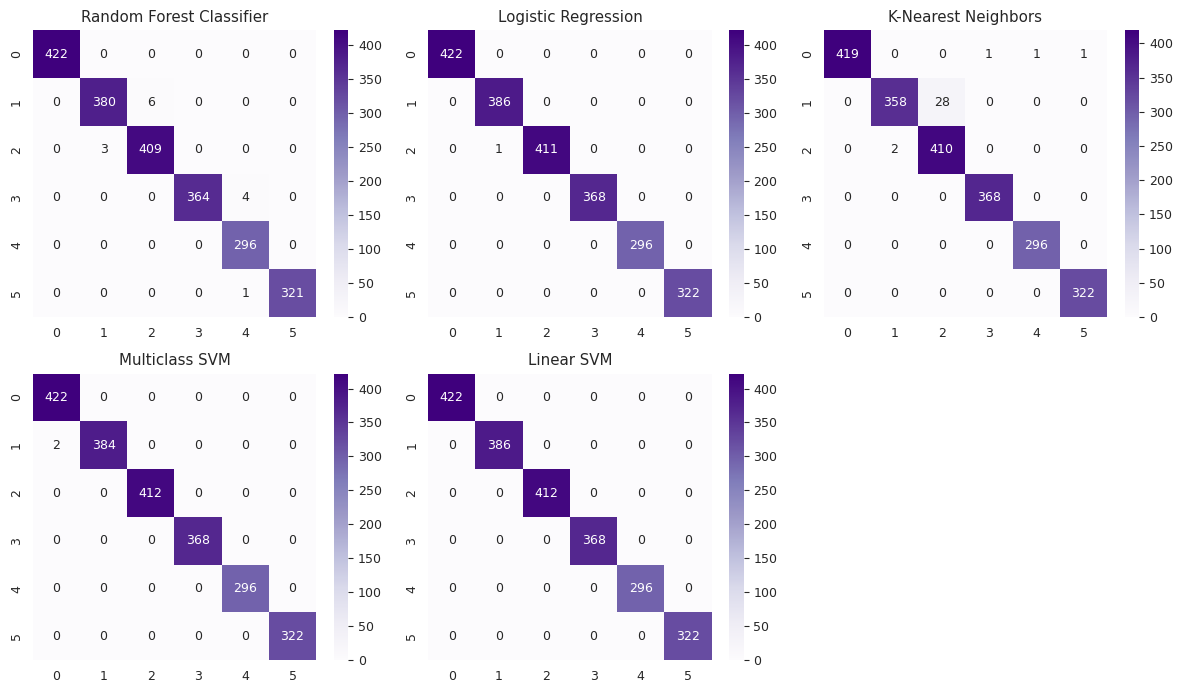

In [182]:
# Create an empty dictionary to store the confusion matrices for each model
confusion_mat1 = dict()

# Iterate through the list of model labels, computing the confusion matrix for each model and storing the result in the appropriate dictionary key
for lab in labels:
    confusion_mat1[lab] = confusion_matrix(y_val, y_predict[lab])

# Create a new figure and subplot grid with 2 rows and 3 columns
figure, axisList = plt.subplots(nrows=2, ncols=3)

# Flatten the subplot grid into a 1D array
axisList = axisList.flatten()

# Set the size of the figure
figure.set_size_inches(12, 7)

# Turn off the axis for the last subplot
axisList[-1].axis('off')

# Iterate through the subplot array and plot each confusion matrix as a heatmap with the appropriate title
for axis,lab in zip(axisList[:-1], labels):
    axis.set(title=lab);
    sns.heatmap(confusion_mat1[lab], ax=axis, annot=True, fmt='d', cmap='Purples')

# Automatically adjust the spacing between subplots to avoid overlap
plt.tight_layout()

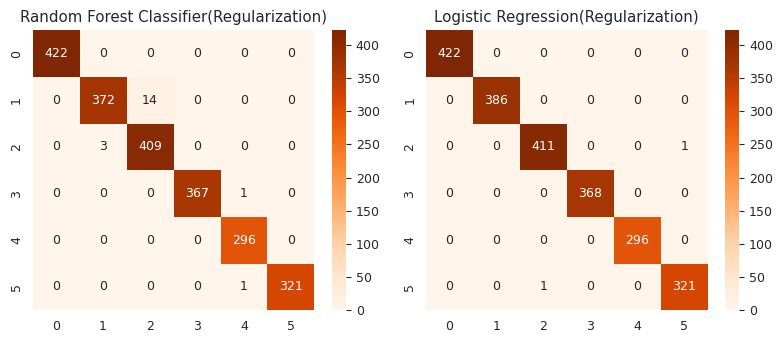

In [183]:
confusion_mat2 = dict()
for lab in labels_r:
    confusion_mat2[lab] = confusion_matrix(y_val, yr_predict[lab])

figure, axisList = plt.subplots(nrows=1, ncols=2)
axisList = axisList.flatten()
figure.set_size_inches(8, 3.5)

for axis,lab in zip(axisList[:], labels_r):
    axis.set(title=lab);
    sns.heatmap(confusion_mat2[lab], ax=axis, annot=True, fmt='d', cmap='Oranges')

plt.tight_layout()

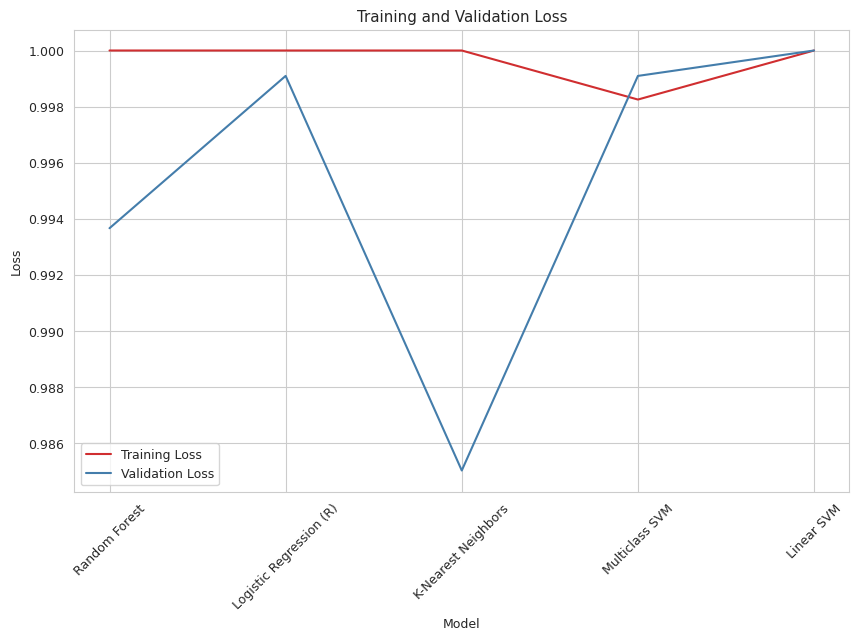

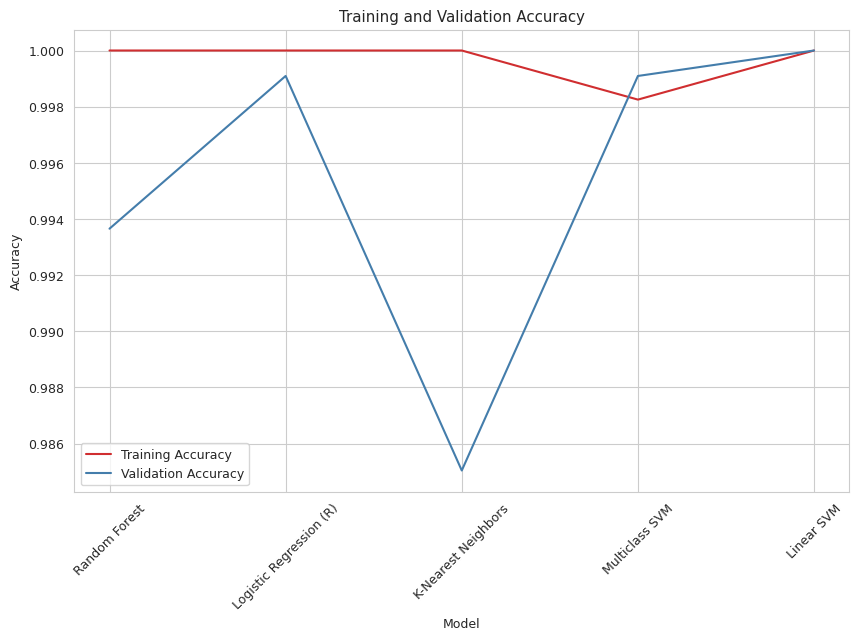

In [184]:
# Train the models and record the metrics
models = [ran_for, log_reg_r, knn, svm_mc, linear_svm]
model_names = ['Random Forest', 'Logistic Regression (R)', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    
    train_loss.append(error_metric(y_train, y_train_pred, average='weighted')[2])
    val_loss.append(error_metric(y_val, y_val_pred, average='weighted')[2])
    train_acc.append(accuracy_score(y_train, y_train_pred))
    val_acc.append(accuracy_score(y_val, y_val_pred))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_loss, label='Training Loss')
plt.plot(model_names, val_loss, label='Validation Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_acc, label='Training Accuracy')
plt.plot(model_names, val_acc, label='Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [185]:
# Define the hyperparameters for the voting classifier
params = {'voting': 'soft', 'weights': [1, 1]}

# Create the ensemble model
vc_clf = VotingClassifier([('log_reg', log_reg_r), ('linear_svm', linear_svm)], **params)

# Fit the ensemble model
vc_clf.fit(x_train, y_train)
y_pred = vc_clf.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 1.000000


In [186]:
# Print out the accuracy for each activity label
models_compf = {'Voting Classifier': vc_clf}
accuracies_f = {label: {name: [] for name in models} for label in range(6)}
results_f = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compf.items():
        yf_pred = model.predict(x_val[y_val == label])
        acc_f = accuracy_score(y_val[y_val == label], yf_pred)
        print(f'{name} accuracy for {label_name}: {acc_f:.4f}')
        accuracies_f[label][name] = acc_f
        row.append(acc_f)
    results_f.append(row)

Voting Classifier accuracy for LAYING: 1.0000
Voting Classifier accuracy for SITTING: 1.0000
Voting Classifier accuracy for STANDING: 1.0000
Voting Classifier accuracy for WALKING: 1.0000
Voting Classifier accuracy for WALKING_DOWNSTAIRS: 1.0000
Voting Classifier accuracy for WALKING_UPSTAIRS: 1.0000


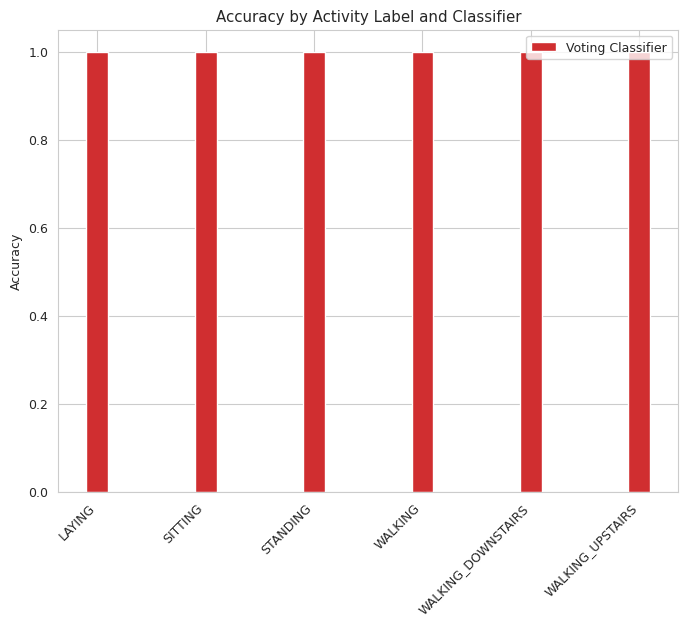

In [187]:
# Plot the bar chart
labels_af = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_af))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_compf):
    accuracies_list_f = [accuracies_f[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list_f, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels_af, rotation=45, ha='right')
ax.legend()

plt.show()

In [188]:
headers = ["Activity Label"] + list(models_compf.keys())
print(tabulate(results_f, headers=headers, tablefmt="grid"))

+--------------------+---------------------+
| Activity Label     |   Voting Classifier |
+====================+=====================+
| LAYING             |                   1 |
+--------------------+---------------------+
| SITTING            |                   1 |
+--------------------+---------------------+
| STANDING           |                   1 |
+--------------------+---------------------+
| WALKING            |                   1 |
+--------------------+---------------------+
| WALKING_DOWNSTAIRS |                   1 |
+--------------------+---------------------+
| WALKING_UPSTAIRS   |                   1 |
+--------------------+---------------------+


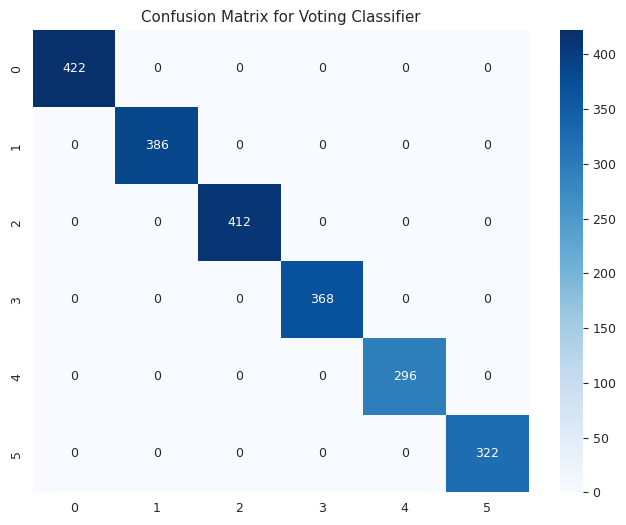

In [189]:
confusion_matf = dict()
confusion_matf = confusion_matrix(y_val, y_pred)
figure, axis = plt.subplots()
figure.set_size_inches(8, 6)
axis.set(title='Confusion Matrix for Voting Classifier')
sns.heatmap(confusion_matf, ax=axis, annot=True, fmt='d', cmap='Blues')
plt.show()

In [190]:
# Split the test data into a testing and holdout set
x_test, x_holdout, y_test, y_holdout = train_test_split(
    test[feature_columns], 
    test['Activity'], 
    test_size=0.5, # Use 50% of the test data for testing
    random_state=42
)

# Print the size of the testing and holdout sets
print(f"Testing set size: {len(x_test)}")
print(f"Holdout set size: {len(x_holdout)}")

Testing set size: 1473
Holdout set size: 1474


In [191]:
ytest_predict = list()
ytest_proba = list()

labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']
models = [ran_for, logi_reg, knn, svm_mc, linear_svm]

for lab, mod in zip(labels, models):
    ytest_predict.append(pd.Series(mod.predict(x_test), name = lab))
    ytest_proba.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name = lab))

ytest_predict = pd.concat(ytest_predict, axis = 1)
ytest_proba = pd.concat(ytest_proba, axis = 1)
ytest_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,2,2,2,2,2
1,4,4,4,4,4
2,3,3,3,3,3
3,1,1,1,1,1
4,2,2,2,2,2


In [192]:
errtest_metrics = list()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_test, ytest_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_test, ytest_predict[lab])
    errtest_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
errtest_metrics= pd.concat(errtest_metrics, axis =1) 
errtest_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.970057,0.994594,0.943259,0.991983,1.0
Recall,0.969450,0.994569,0.939579,0.991853,1.0
F_score,0.969362,0.994564,0.938538,0.991841,1.0
Accuracy,0.969450,0.994569,0.939579,0.991853,1.0


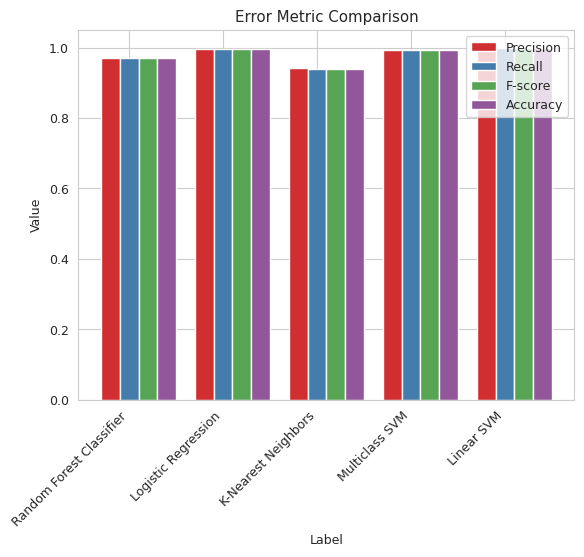

In [193]:
precision_values = errtest_metrics.loc['Precision', :]
recall_values = errtest_metrics.loc['Recall', :]
fscore_values = errtest_metrics.loc['F_score', :]
accuracy_values = errtest_metrics.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

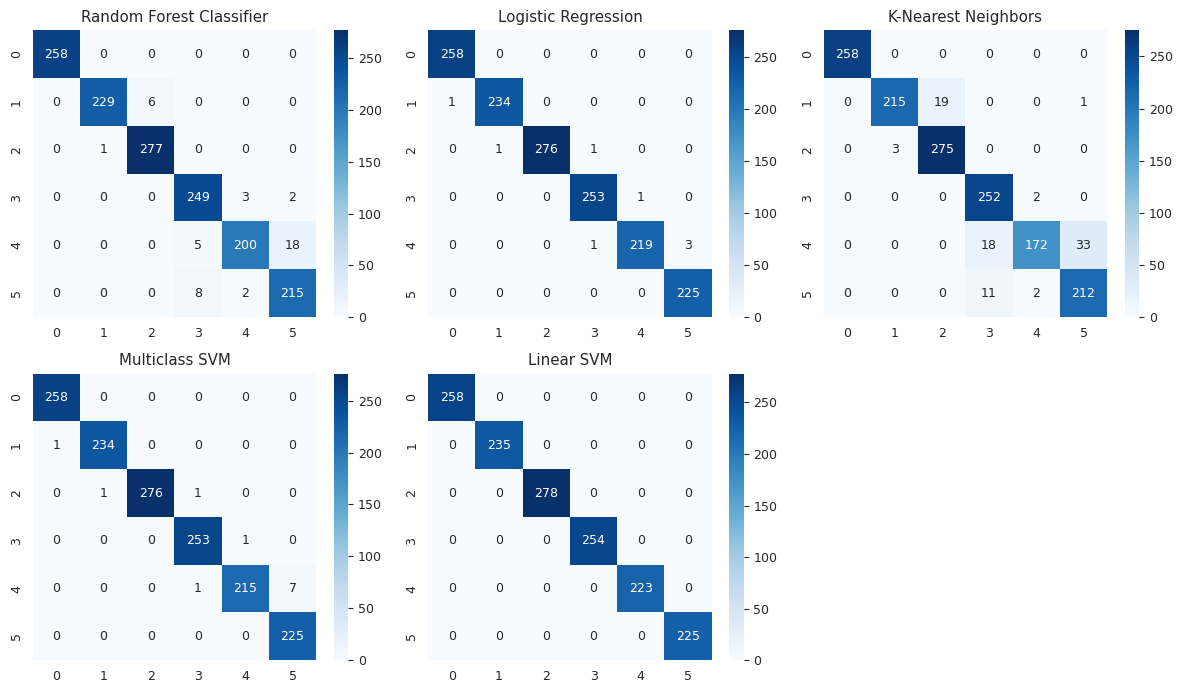

In [194]:
confusiontest_mat = dict()

for lab in labels:
    confusiontest_mat[lab] = confusion_matrix(y_test, ytest_predict[lab])

figure, axisList = plt.subplots(nrows=2, ncols=3)
axisList = axisList.flatten()
figure.set_size_inches(12, 7)

axisList[-1].axis('off')

for axis,lab in zip(axisList[:-1], labels):
    axis.set(title=lab);
    sns.heatmap(confusiontest_mat[lab], ax=axis, annot=True, fmt='d', cmap='Blues')
    
plt.tight_layout()

In [195]:
yt_pred = vc_clf.predict(x_test)
accuracy = accuracy_score(y_test, yt_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.995927


In [196]:
# Print out the accuracy for each activity label
models_compt = {'Voting Classifier': vc_clf}
results_t = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compt.items():
        yt_pred_t = model.predict(x_test[y_test == label])
        acc_t = accuracy_score(y_test[y_test == label], yt_pred_t)
        row.append(acc_t)
    results_t.append(row)

In [197]:
headers = ["Activity Label"] + list(models_compt.keys())
print(tabulate(results_t, headers=headers, tablefmt="grid"))

+--------------------+---------------------+
| Activity Label     |   Voting Classifier |
+====================+=====================+
| LAYING             |            1        |
+--------------------+---------------------+
| SITTING            |            0.995745 |
+--------------------+---------------------+
| STANDING           |            0.996403 |
+--------------------+---------------------+
| WALKING            |            1        |
+--------------------+---------------------+
| WALKING_DOWNSTAIRS |            0.982063 |
+--------------------+---------------------+
| WALKING_UPSTAIRS   |            1        |
+--------------------+---------------------+


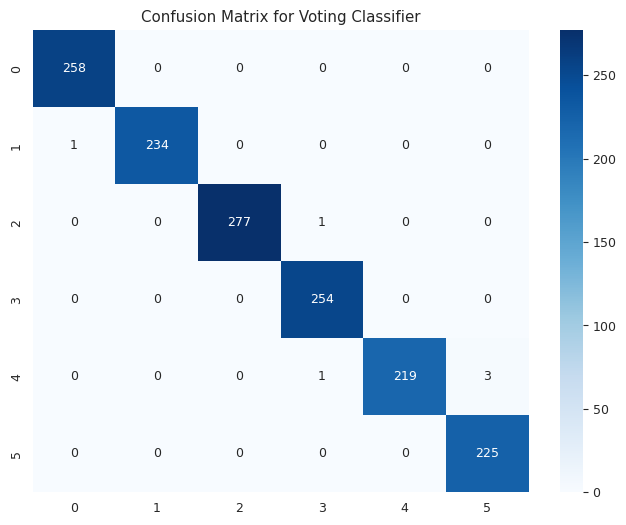

In [198]:
confusion_matt = dict()
confusion_matt = confusion_matrix(y_test, yt_pred)
figure, axis = plt.subplots()
figure.set_size_inches(8, 6)
axis.set(title='Confusion Matrix for Voting Classifier')
sns.heatmap(confusion_matt, ax=axis, annot=True, fmt='d', cmap='Blues')
plt.show()

In [199]:
test_ = pd.read_csv("Dataset/manual_test.csv")

In [200]:
test_.drop('subject', axis =1, inplace=True)

In [201]:
# Applying LabelEncoder function

labEncoder = LabelEncoder()
for x in [test_]:
    x['Activity'] = labEncoder.fit_transform(x.Activity)
    
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

In [202]:
print(test_.iloc[30]['Activity'])

4.0


In [203]:
# Split the test data into a testing and holdout set
x1_test, y1_test = (
    test_[feature_columns], 
    test_['Activity'], 
)

In [204]:
y1test_predict = list()
y1test_proba = list()

labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']

for lab, mod in zip(labels, models):
    y1test_predict.append(pd.Series(mod.predict(x1_test), name = lab))
    y1test_proba.append(pd.Series(mod.predict_proba(x1_test).max(axis=1), name = lab))

y1test_predict = pd.concat(y1test_predict, axis = 1)
y1test_proba = pd.concat(y1test_proba, axis = 1)
y1test_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,2,2,2,2,2
1,2,2,2,2,2
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2


In [205]:
y1test_proba

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0.89,0.994598,0.936418,0.998042,0.997699
1,0.77,0.986404,0.606123,0.995229,0.997389
2,0.88,0.985593,1.000000,0.992500,0.998091
3,0.96,0.998445,1.000000,0.999119,0.997815
4,0.86,0.998665,1.000000,0.999005,0.998237
5,0.52,0.803492,0.659700,0.986825,0.980013
6,0.54,0.956010,0.797684,0.990459,0.998390
7,0.96,0.997480,1.000000,0.999191,0.997507
8,0.53,0.988467,0.732728,0.994603,0.998160
9,0.86,0.966052,0.737341,0.993965,0.997708


In [206]:
errtest_metrics = list()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y1_test, y1test_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y1_test, y1test_predict[lab])
    errtest_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
errtest_metrics= pd.concat(errtest_metrics, axis =1) 
errtest_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.956439,0.979167,0.912500,1.0,1.0
Recall,0.950000,0.975000,0.900000,1.0,1.0
F_score,0.949762,0.975000,0.898701,1.0,1.0
Accuracy,0.950000,0.975000,0.900000,1.0,1.0


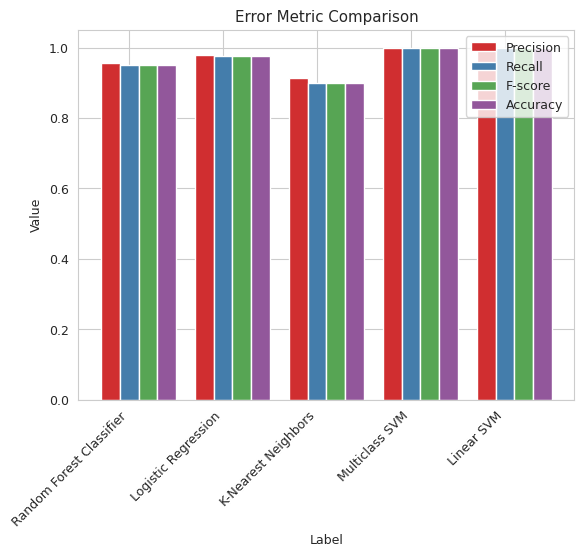

In [207]:
precision_values = errtest_metrics.loc['Precision', :]
recall_values = errtest_metrics.loc['Recall', :]
fscore_values = errtest_metrics.loc['F_score', :]
accuracy_values = errtest_metrics.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

In [208]:
# Use the predict method to make predictions on your test data
y_pred = linear_svm.predict(x1_test)

# Print the predicted output
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

x=1
for i in y_pred:
    if(i==0): print(x,"LAYING")
    elif(i==1): print(x,"SITTING")
    elif(i==2): print(x,"STANDING")
    elif(i==3): print(x,"WALKING")
    elif(i==4): print(x,"WALKING_DOWNSTAIRS")
    elif(i==5): print(x,"WALKING_UPSTAIRS")
    x+=1

1 STANDING
2 STANDING
3 STANDING
4 STANDING
5 STANDING
6 SITTING
7 SITTING
8 SITTING
9 SITTING
10 SITTING
11 SITTING
12 LAYING
13 LAYING
14 LAYING
15 WALKING
16 WALKING
17 WALKING
18 WALKING
19 WALKING
20 WALKING
21 WALKING
22 WALKING
23 WALKING
24 WALKING
25 WALKING_DOWNSTAIRS
26 WALKING_DOWNSTAIRS
27 WALKING_DOWNSTAIRS
28 WALKING_DOWNSTAIRS
29 WALKING_DOWNSTAIRS
30 WALKING_DOWNSTAIRS
31 WALKING_DOWNSTAIRS
32 WALKING_DOWNSTAIRS
33 WALKING_UPSTAIRS
34 WALKING_UPSTAIRS
35 WALKING_UPSTAIRS
36 WALKING_UPSTAIRS
37 WALKING_UPSTAIRS
38 WALKING_UPSTAIRS
39 WALKING_UPSTAIRS
40 WALKING_UPSTAIRS


In [210]:
from PIL import Image, ImageTk
from tkinter import PhotoImage

# Define the activity labels
activity_labels = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Create the GUI
class App:
    def __init__(self, master):

        # Initialize the index counter
        self.index = 0

        # Set the master frame
        self.master = master

        # Set the title
        master.title("Activity Prediction GUI")

        # Set the window size
        master.geometry("1000x500")
        
        #Setting minsize
        master.minsize(1000, 500)

        # Set the background color
        master.configure(bg='#0579b5')

        # Set the label for the output
        self.output_label = tk.Label(master, text="", font=('Helvetica', 20), fg='white', bg='#0579b5')
        self.output_label.pack(pady=20)

        # Set the button to iterate to the next record
        self.next_button = tk.Button(master, text="Next Record", font=('Helvetica', 14), bg='white', command=self.next_record)
        self.next_button.pack(side=tk.RIGHT, padx=10)

        # Set the button to display the percentage of each activity
        self.percentage_button = tk.Button(master, text="Activity Percentage", font=('Helvetica', 14), bg='white', command=self.activity_percentage)
        self.percentage_button.pack(side=tk.LEFT, padx=10)

        self.activity_counters = {}
        for label in activity_labels:
            self.activity_counters[label] = 0

        # Create a Figure object for the plot
        self.fig = plt.Figure(figsize=(8,6), dpi=100)

        # Create a Canvas for the plot
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)

        # Create a Subplot for the plot
        self.ax = self.fig.add_subplot(111)
        self.ax.set_title('Activity Percentage')
        self.ax.set_xlabel('Activity')
        self.ax.set_ylabel('Percentage')
        
        # Load the activity image
        self.activity_image = None

        # Create a Label widget for the activity image
        self.activity_image_label = tk.Label(root, image=self.activity_image, bg='#0579b5')
        self.activity_image_label.pack(pady=20)

    # Function to predict the activity for the next record
    def next_record(self):

        # Check if all records have been processed
        if self.index == len(x1_test):
            self.activity_image = None
            # Update the animation
            self.activity_image_label.configure(image=self.activity_image)
            self.activity_image_label.image = self.activity_image
            self.output_label.configure(text="All records processed!")
            self.next_button.configure(state='disabled')
            return

        # Predict the activity
        activity = linear_svm.predict(x1_test)

        # Map the activity code to the activity label
        activity_label = activity_labels[activity[self.index]]

        # Update the activity image if not all records have been processed
        if self.index < len(x1_test):
            self.activity_image = ImageTk.PhotoImage(Image.open(f"images\\{activity_label}.png").resize((380, 380)))
        else:
            self.activity_image = None
        self.activity_image_label.configure(image=self.activity_image) # Keep a reference to avoid garbage collection

        # Update the animation
        self.activity_image_label.configure(image=self.activity_image)
        self.activity_image_label.image = self.activity_image

        # Increment the index counter
        self.index += 1

        # Update the activity counters
        self.activity_counters[activity_label] += 1

        # Calculate the activity percentages
        total_activities = sum(self.activity_counters.values())
        activity_percentages = {}
        for label in activity_labels:
            activity_percentages[label] = self.activity_counters[label] / total_activities

        # Update the output label
        output_text = "Record " + str(self.index) + ": " + activity_label
        self.output_label.configure(text=output_text)

    # Function to display the percentage of each activity in a new window
    def activity_percentage(self):
        if self.index == 0:
            # No record has been processed yet
            self.output_label.configure(text="Please process at least one record before checking activity percentage.")
            return
        
        # Calculate the activity percentages
        total_activities = sum(self.activity_counters.values())
        activity_percentages = {}
        for label in activity_labels:
            activity_percentages[label] = self.activity_counters[label] / total_activities

        # Create a new window
        percentage_window = tk.Toplevel(self.master)
        percentage_window.title("Activity Percentage")
        percentage_window.geometry("1500x600")
        percentage_window.minsize(1400, 600)

        # Create a Figure object for the plot
        fig = plt.Figure(figsize=(8,6), dpi=100)
        
        # Define colors for each activity
        activity_colors = {
                    0: 'violet',
                    1: 'blue',
                    2: 'indigo',
                    3: 'green',
                    4: 'orange',
                    5: 'red',
                    }

        # Create a Subplot for the plot
        ax = fig.add_subplot(111)
        for i, label in enumerate(activity_labels):
            ax.bar(label, activity_percentages[label], color=activity_colors[i])
        ax.set_title('Activity Percentage')
        ax.set_xlabel('Activity')
        ax.set_ylabel('Percentage')
        ax.set_ylim([0, 1])

        # Add the percentage labels to the plot
        for i, percentage in enumerate(activity_percentages.values()):
            ax.text(i, percentage+0.05, f"{percentage*100:.2f}%", horizontalalignment='center')

        # Create a Canvas for the plot
        canvas = FigureCanvasTkAgg(fig, master=percentage_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)


root = tk.Tk()
app = App(root)
root.mainloop()